<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/web-pages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Pages Dataset Exploration

We're going to take a look at a few examples of how we can explore the Web Pages dataset. 

The first thing we need to do is enter the URL for our Web Pages dataset in the cell below. You can get this by right clicking the Download icon, and selecting "Copy Link".

In [1]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14462/WebPagesExtraction/web-pages.csv.gz?access=ZIOJDHQANIBE2XDPSDLAZWQBO7EN2QHE' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14462/WebPagesExtraction/web-pages.csv.gz?access=ZIOJDHQANIBE2XDPSDLAZWQBO7EN2QHE


## pandas

Next, we'll setup our environment so we can load our Web Pages Information dataset into [pandas](https://pandas.pydata.org) DataFrames. If you're unfamiliar with DataFrames, but you've worked with spreadsheets before, you should feel comfortable pretty quick.

# Environment

Next, we'll setup our environment so we can load our derivatives into [pandas](https://pandas.pydata.org).

In [2]:
import pandas as pd

# Data Table Display

Colab includes an extension that renders pandas DataFrames into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides!

Data table display for pandas DataFrames can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [3]:
%load_ext google.colab.data_table

## Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [3]:
web_pages = pd.read_csv(dataset, compression='gzip')
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20200624234229,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/,text/html,application/xhtml+xml,en,Jimmy Lin » Homepage Jimmy Lin University of W...
1,20200624234259,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/,text/html,NaN,NaN,NaN
2,20200624234508,uwaterloo.ca,https://uwaterloo.ca/,text/html,text/html,en,Home | University of Waterloo | University of ...
3,20200624234514,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/index.html,text/html,NaN,NaN,NaN
4,20200624234543,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/publications...,text/html,application/xhtml+xml,en,Jimmy Lin » Publications Jimmy Lin University ...
...,...,...,...,...,...,...,...
8746,20220624224904,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,NaN,NaN,NaN
8747,20220624224919,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,text/html,en,Extract Binary Info · Archives Unleashed Toolk...
8748,20220624224930,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,NaN,NaN,NaN
8749,20220624224938,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,NaN,NaN,NaN


## Text Analysis

Next, we'll do some basic text analysis with our `web_pages` DataFrame with `nltk` and`spaCy`, and end with a word cloud.


In [4]:
import re

import nltk

In [5]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

We'll drop the `NaN` values in our DataFrame to clean things up a bit.

In [7]:
web_pages = web_pages.dropna()
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20200624234229,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/,text/html,application/xhtml+xml,en,Jimmy Lin » Homepage Jimmy Lin University of W...
2,20200624234508,uwaterloo.ca,https://uwaterloo.ca/,text/html,text/html,en,Home | University of Waterloo | University of ...
4,20200624234543,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/publications...,text/html,application/xhtml+xml,en,Jimmy Lin » Publications Jimmy Lin University ...
5,20200624234647,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/projects/ind...,text/html,application/xhtml+xml,en,Jimmy Lin » Projects Jimmy Lin University of W...
6,20200624234753,uwaterloo.ca,https://cs.uwaterloo.ca/~jimmylin/students.html,text/html,application/xhtml+xml,en,Jimmy Lin » Students Jimmy Lin University of W...
...,...,...,...,...,...,...,...
8729,20220624223547,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,text/html,en,Extract Binary Info · Archives Unleashed Toolk...
8740,20220624224046,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,text/html,en,Link Analysis · Archives Unleashed Toolkit Arc...
8742,20220624224844,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,text/html,en,Binary Analysis · Archives Unleashed Toolkit A...
8745,20220624224858,archivesunleashed.org,https://aut.docs.archivesunleashed.org/docs/0....,text/html,text/html,en,The Toolkit with spark-submit · Archives Unlea...


We need to set the [`mode.chained_assignment`](https://pandas.pydata.org/docs/user_guide/options.html?highlight=chained_assignment) to `None` now to silence some exception errors that will come up.

In [8]:
pd.options.mode.chained_assignment = None

Next, we'll setup a tokenizer which will split on words, and create a new column which is the tokenized text.

In [9]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [10]:
web_pages["content_tokenized"] = web_pages["content"].map(tokenizer.tokenize)

Now well create a column with the tokenized value count.

In [11]:
web_pages["content_tokens"] = web_pages["content_tokenized"].apply(lambda x: len(x))

### Basic word count statistics with pandas!

Now we can use the power of pandas [Statisitcal functions](https://pandas.pydata.org/docs/user_guide/computation.html) to show us some basic statistics about the tokens.

**Mean**

In [12]:
web_pages["content_tokens"].mean()

879.4164798206278

**Standard deviation**


In [13]:
web_pages["content_tokens"].std()

1809.6710903685419

**Max**

In [14]:
web_pages["content_tokens"].max()

21042

**Min**

In [15]:
web_pages["content_tokens"].min()

1

### Pages with most words

Let's create a bar chart that shows the pages with the most words. Here we can see the power of pandas at work, in terms of both analysis and visualization.

First, let's show the query to get the data for our chart.

In [16]:
word_count = (
    web_pages[["url", "content_tokens"]]
    .sort_values(by="content_tokens", ascending=False)
    .head(25)
)

In [17]:
word_count

,url,content_tokens
8437,https://cs.uwaterloo.ca/~jimmylin/publications...,21042
8158,https://cs.uwaterloo.ca/~jimmylin/publications...,20910
7879,https://cs.uwaterloo.ca/~jimmylin/publications...,20633
7600,https://cs.uwaterloo.ca/~jimmylin/publications...,20558
7321,https://cs.uwaterloo.ca/~jimmylin/publications...,20485
7041,https://cs.uwaterloo.ca/~jimmylin/publications...,20439
6782,https://cs.uwaterloo.ca/~jimmylin/publications...,20396
6524,https://cs.uwaterloo.ca/~jimmylin/publications...,20364
6348,https://cs.uwaterloo.ca/~jimmylin/publications...,20289
6126,https://cs.uwaterloo.ca/~jimmylin/publications...,20083


Next, let's create a bar chart of this.

In [18]:
import altair as alt

word_count_bar = (
    alt.Chart(word_count)
    .mark_bar()
    .encode(x=alt.X("url:O", sort="-y"), y=alt.Y("content_tokens:Q"))
)

word_count_rule = (
    alt.Chart(word_count).mark_rule(color="red").encode(y="mean(content_tokens):Q")
)

word_count_text = word_count_bar.mark_text(align="center", baseline="bottom").encode(
    text="content_tokens:Q"
)

(word_count_bar + word_count_rule + word_count_text).properties(
    width=1400, height=700, title="Pages with the most words"
)

alt.LayerChart(...)

### How about NER on the page with the most tokens?

[Named-Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition), or NER, is an exciting field of natural language processing that lets us extract "entities" out of text; the names of people, locations, or organizations.

To do this, we first need to find the pages that have the most tokens.

In [19]:
word_count_max = (
    web_pages[["url", "content_tokens", "content"]]
    .sort_values(by="content_tokens", ascending=False)
    .head(1)
)
word_count_max["url"]

8437    https://cs.uwaterloo.ca/~jimmylin/publications...
Name: url, dtype: object

We'll remove the column width limit so we can check out our content for the page.

In [20]:
pd.set_option("display.max_colwidth", None)

Let's take a look at our page's content.

In [21]:
page = word_count_max["content"].astype("unicode").to_string()
page

'8437    Jimmy Lin » Publications Jimmy Lin University of Waterloo Home Publications Projects Students Teaching Resources Publications Restrict? Restrict? deep learning, neural networks reproducibility, evaluation issues and methodology big data, large-scale data processing information seeking, user interaction, visualization Twitter, real-time search and filtering medical and biomedical informatics information retrieval computational social science, digital humanities question answering, document summarization hydrology, water sciences natural language processing, computational linguistics Jump to: 2029 | 2028 | 2027 | 2026 | 2025 | 2024 | 2023 | 2022 | 2021 | 2020 2019 | 2018 | 2017 | 2016 | 2015 | 2014 | 2013 | 2012 | 2011 | 2010 2009 | 2008 | 2007 | 2006 | 2005 | 2004 | 2003 | 2002 | 2001 | 2000 1999 | 1998 2022 557. Xueguang Ma, Ronak Pradeep, Rodrigo Nogueira, and Jimmy Lin. Document Expansions and Learned Sparse Lexical Representations for MS MARCO V1 and V2. Proceedings of the 


#### Setup spaCy

We now need to set up [spaCy](https://en.wikipedia.org/wiki/SpaCy), a natural-language processing toolkit.


In [22]:
import en_core_web_sm
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

nlp.max_length = 1100000

Next we'll run the natual language processor from SpaCy, and then display the NER output. Watch how it finds organizations, people, and beyond!

In [23]:
ner = nlp(page)
displacy.render(ner, style="ent", jupyter=True)

### Sentiment Analysis

We'll be using the [vaderSentiment](https://github.com/cjhutto/vaderSentiment) library and [adapting examples](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html#) from Melanie Walsh's ["Introduction to Cultural Analytics & Python"](https://melaniewalsh.github.io/Intro-Cultural-Analytics).

In [24]:
%%capture

!pip install vaderSentiment

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
sentimentAnalyser = SentimentIntensityAnalyzer()

We'll create a function, that we'll then apply to a DataFrame to create sentiment analysis scores for the `content` column.

In [26]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

Since it will take some time to run the sentiment analysis on the entire `web_pages` DataFrame, we'll create a sample from `web_pages`, and run the sentiment analysis on that for demostration purposes.

In [27]:
web_pages_sample = web_pages.sample(500)

In [28]:
web_pages_sample['sentiment_score'] = web_pages_sample['content'].apply(calculate_sentiment)

Let's see what the the scores look like.

In [29]:
web_pages_sample[['sentiment_score', 'content']]

sentiment_score  \
2745           0.8658   
3086           0.9994   
1441          -0.1431   
1081           0.9999   
6822           0.0000   
...               ...   
1878           0.8658   
386           -0.9899   
8485           0.0000   
2341           0.0000   
2515          -0.1431   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Finally, let's plot the sentiment score.

In [30]:
sentiment_scores = web_pages_sample[['sentiment_score']].value_counts().head(10).reset_index()
sentiment_scores = sentiment_scores.rename({"sentiment_score": "Sentiment Score", 0: "Count"}, axis=1)

sentiment_chart = (
    alt.Chart(sentiment_scores)
    .mark_circle()
    .encode(
        x=alt.X("Sentiment Score:Q", bin=True),
        y=alt.Y("Count:Q", bin=True),
        size='Count')
)

sentiment_chart.properties(
    width=1400, height=700, title="Sentiment Score Distribution"
)

alt.Chart(...)

### Wordcloud

What better way to wrap-up this notebook than by creating a word cloud!

Word clouds are always fun, right?! They're an interesting way to visualize word frequency, as the more times that a word occurs, the larger it will appear in the word cloud.

Let's setup some dependencies here. We will install the [word_cloud](https://github.com/amueller/word_cloud) library and setup some stop words via `nltk`.

In [31]:
%%capture

!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator

Let's remove the remove the stopwords from our data.

In [32]:
stopwords = stopwords.words("english")

In [33]:
web_pages["stopwords"] = web_pages["content_tokenized"].apply(
    lambda x: [item.lower() for item in x if item not in stopwords]
)

Next we'll pull 500 rows of values from our new column.

In [34]:
words = web_pages["stopwords"].head(500)

Now we can create a word cloud!

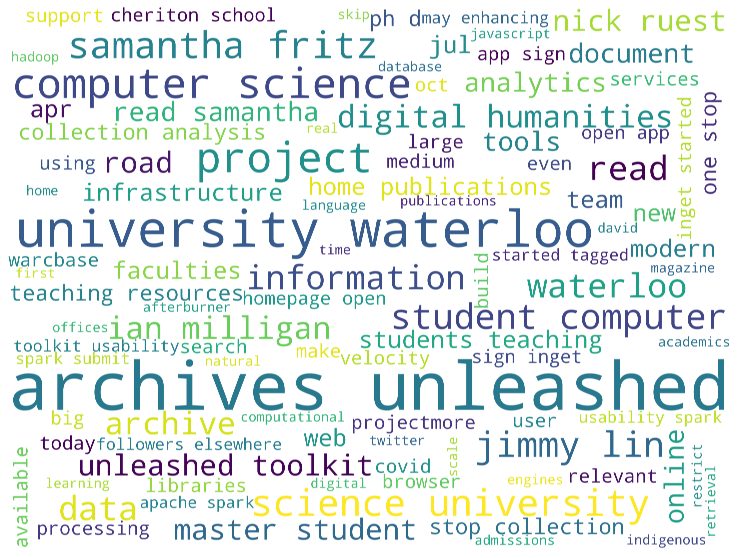

In [35]:
from matplotlib import pyplot as plt

wordcloud = WordCloud(
    width=2000,
    height=1500,
    scale=10,
    max_font_size=250,
    max_words=100,
    background_color="white",
).generate(str(words))
plt.figure(figsize=[35, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()